<a href="https://colab.research.google.com/github/r-avellar/ia-python/blob/main/An%C3%A1lises_preditivas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análises peditivas


Carregando dados

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance

In [ ]:
ticker = input("Digite o ticker da ação desejada: ")

Digite o ticker da ação desejada: PETR4.SA


In [ ]:
acao = yfinance.Ticker(ticker).history("2y")
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-14 00:00:00-03:00,13.314214,13.428214,13.119465,13.119465,53159500,0.0,0
2020-12-15 00:00:00-03:00,13.119465,13.295214,13.119465,13.228715,47208200,0.0,0
2020-12-16 00:00:00-03:00,13.228713,13.413963,13.048213,13.390213,59399200,0.0,0
2020-12-17 00:00:00-03:00,13.442464,13.485214,13.333214,13.413964,39297700,0.0,0
2020-12-18 00:00:00-03:00,13.347464,13.451963,13.309464,13.347464,44707900,0.0,0
...,...,...,...,...,...,...,...
2022-12-06 00:00:00-03:00,25.820000,26.389999,25.420000,25.639999,74991200,0.0,0
2022-12-07 00:00:00-03:00,25.340000,26.070000,25.270000,25.350000,57008400,0.0,0
2022-12-08 00:00:00-03:00,25.549999,25.790001,24.639999,24.780001,55567700,0.0,0


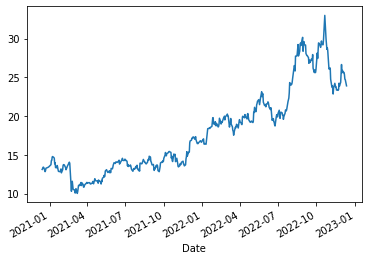

In [ ]:
acao.Close.plot()

# Tratamento de dados

In [ ]:
dados = acao.reset_index()
colunas = ["Date", "Close"]
dados = dados[colunas]
dados.Date.dt.tz_localize(None)
dados.Date = dados.Date.dt.tz_localize(None)
dados.columns = ['ds', "y"]
dados

,ds,y
0,2020-12-14,13.119465
1,2020-12-15,13.228715
2,2020-12-16,13.390213
3,2020-12-17,13.413964
4,2020-12-18,13.347464
...,...,...
490,2022-12-06,25.639999
491,2022-12-07,25.350000
492,2022-12-08,24.780001
493,2022-12-09,24.709999


# Treinando o modelo de dados -> Prophet

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet 
from prophet.plot import plot_plotly as px

In [15]:
modelo = Prophet()
modelo.fit(dados)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfc45bl6e/4kcqbot4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfc45bl6e/noq645e6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83278', 'data', 'file=/tmp/tmpfc45bl6e/4kcqbot4.json', 'init=/tmp/tmpfc45bl6e/noq645e6.json', 'output', 'file=/tmp/tmpfc45bl6e/prophet_modellncl568a/prophet_model-20221212214329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:43:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:43:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
periodo = modelo.make_future_dataframe(90)

In [17]:
previsoes = modelo.predict(periodo)

In [18]:
px(modelo, previsoes)